## TASK 3: SALES PREDICITON MODEL 

## Importing the libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load and Explore the Data

## Load the Dataset

In [7]:
sales = pd.read_csv('advertising.csv')

In [9]:
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [57]:
sales.shape

(200, 4)

##  Display the first few rows of the dataset

In [11]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Checking for missing values

In [15]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Display summary statistics

In [20]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Preprocessing the data

## Selecting the features and target variable

In [26]:
x = sales[['TV','Radio','Newspaper']]
y = sales['Sales']

##  Visualizing the Preprocess data

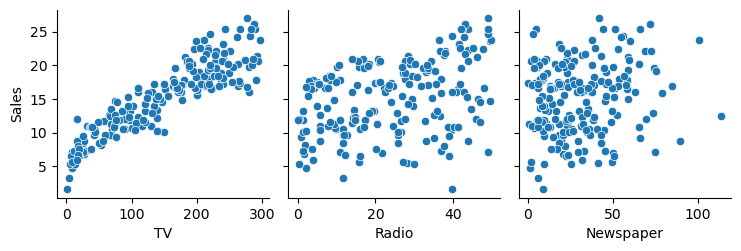

In [62]:
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

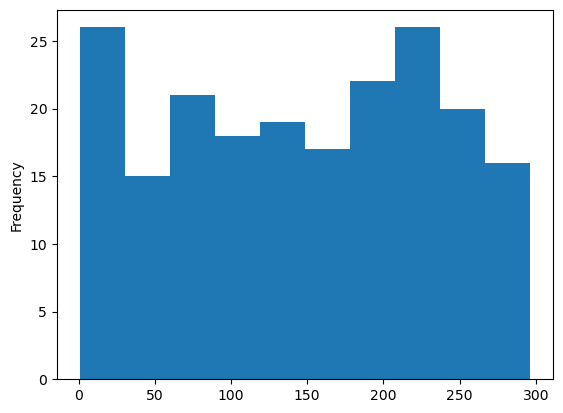

In [64]:
sales['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

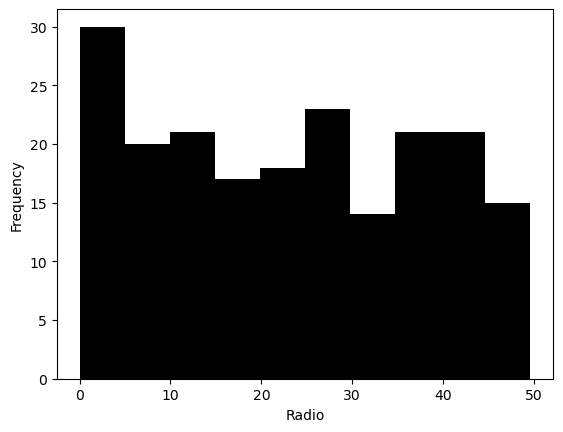

In [66]:
sales['Radio'].plot.hist(bins=10, color = "black",xlabel="Radio")

<Axes: xlabel='Newspaper', ylabel='Frequency'>

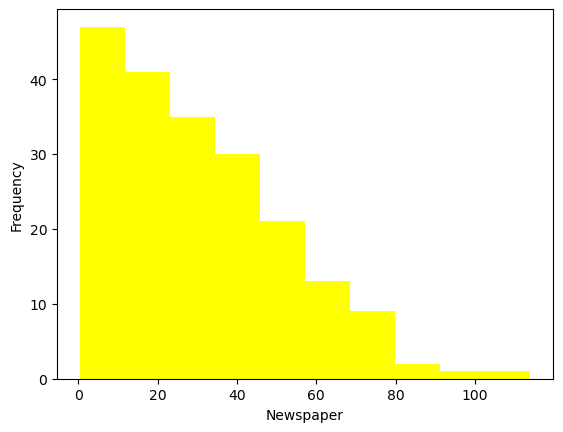

In [70]:
sales['Newspaper'].plot.hist(bins=10,color="yellow",xlabel="Newspaper")

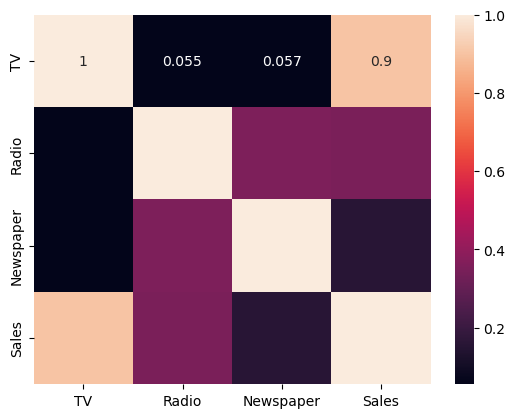

In [74]:
sns.heatmap(sales.corr(),annot=True)
plt.show()

## Split the Data into training and testing sets

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [76]:
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [78]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [80]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [82]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

## Train the Model

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Make Predictions

In [37]:
y_pred = model.predict(x_test)

## Evaluate the Model

In [40]:
mse = mean_squared_error(y_test,y_pred)

In [42]:
r2 = r2_score(y_test,y_pred)

In [46]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.9077569102710923
R^2 Score: 0.9059011844150826


## Plot the actual vs predicted values

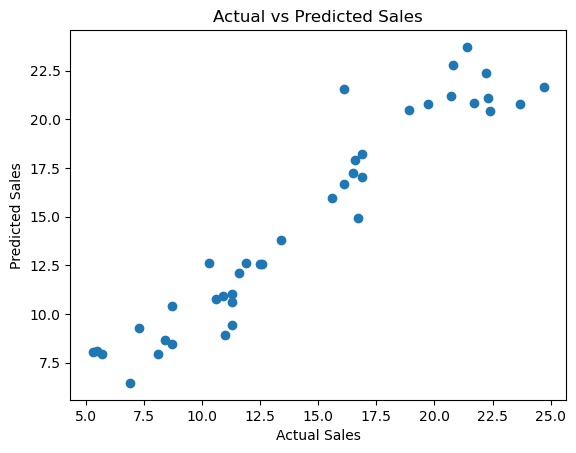

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## Print the Actual and  Predicted Sales

In [84]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
95     16.9  17.034772
15     22.4  20.409740
30     21.4  23.723989
158     7.3   9.272785
128    24.7  21.682719
115    12.6  12.569402
69     22.3  21.081195
170     8.4   8.690350
174    16.5  17.237013
45     16.1  16.666575
66     11.0   8.923965
182     8.7   8.481734
165    16.9  18.207512
78      5.3   8.067507
186    10.3  12.645510
177    16.7  14.931628
56      5.5   8.128146
152    16.6  17.898766
82     11.3  11.008806
68     18.9  20.478328
124    19.7  20.806318
16     12.5  12.598833
148    10.9  10.905183
93     22.2  22.388548
65     11.3   9.417961
60      8.1   7.925067
84     21.7  20.839085
67     13.4  13.815209
125    10.6  10.770809
132     5.7   7.926825
9      15.6  15.959474
18     11.3  10.634909
55     23.7  20.802920
75      8.7  10.434342
150    16.1  21.578475
104    20.7  21.183645
135    11.6  12.128218
137    20.8  22.809533
164    11.9  12.609928
76      6.9   6.464413
